In [111]:
import pandas as pd
from matplotlib import pyplot as plt, ticker
plt.style.use("minimal")

FIGURE_SIZE = (5, 3.5)

In [112]:
def load_data():
    global results
    results = pd.read_csv("results.csv")
    results["response_time"] *= 1000

load_data()
results.sample(5)

,timestamp,trial,response_time,word,cursor_position,target_response,response
123,2024-02-16 09:36:26.940465,6,49.9223,orange,4,g,g
2226,2024-02-16 16:32:38.653174,15,58.1884,kazakhstan,1,a,a
25,2024-02-16 09:31:21.046748,2,107.2367,lemon,2,m,m
2418,2024-02-16 16:39:06.067026,20,127.4361,guyana,4,n,n
73,2024-02-16 09:31:30.983291,10,77.6634,pineapple,0,p,e


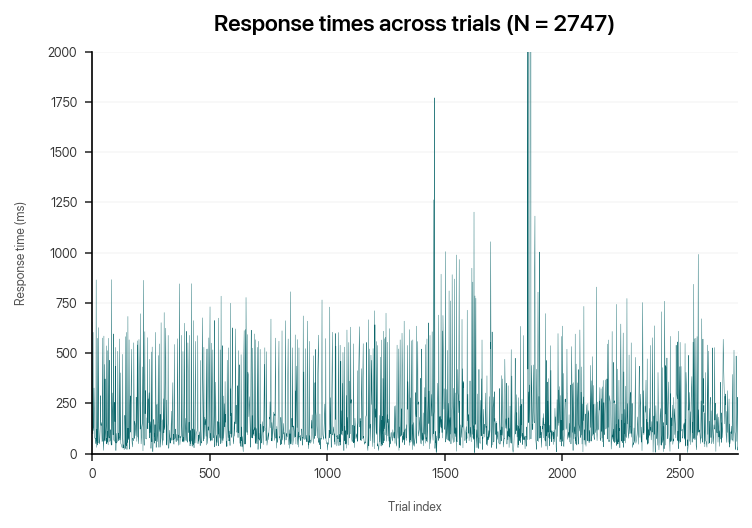

In [113]:
load_data()
plt.figure(figsize=FIGURE_SIZE)
subset = results.sample(2000).sort_index()
plt.plot(
    subset.index, 
    subset["response_time"],
    linewidth = 0.2,
)
plt.title(f"Response times across trials (N = {len(results)})")
plt.xlabel("Trial index")
plt.ylabel("Response time (ms)")
plt.ylim((0, 2000))
plt.tight_layout()

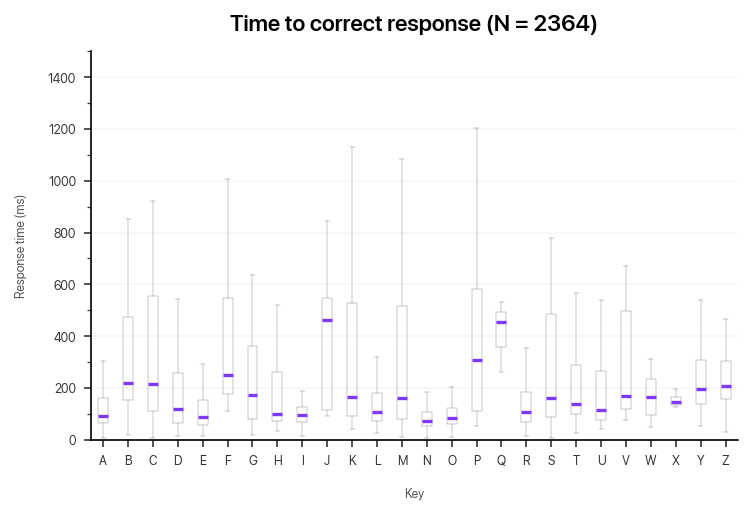

In [117]:
load_data()
plt.figure(figsize=FIGURE_SIZE)
correctly_typed = results[results["response"] == results["target_response"]]
for key, data in correctly_typed.groupby("response"):
    outlines_alpha = 0.5
    plt.boxplot(
        data["response_time"], 
        positions=[ord(key)],
        widths = 0.4,
        boxprops = dict(linewidth = 0.2, alpha = outlines_alpha),
        whiskerprops = dict(linewidth = 0.2, alpha = outlines_alpha),
        capprops = dict(linewidth = 0.2, alpha = outlines_alpha),
        flierprops = dict(marker = "o", markersize = 1, alpha = outlines_alpha, markeredgecolor = "none"),
        medianprops = dict(linewidth = 1.6, color = "C2"),
    )
plt.suptitle("")
plt.title(f"Time to correct response (N = {len(correctly_typed)})")
plt.xlabel("Key")
plt.ylabel("Response time (ms)")
plt.xticks(range(97, 97 + 26), "ABCDEFGHIJKLMNOPQRSTUVWXYZ")
plt.yticks(range(0, 1000, 100))
plt.ylim((0, 1500))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(200))
plt.gca().yaxis.set_minor_locator(ticker.MultipleLocator(100))
plt.tight_layout()

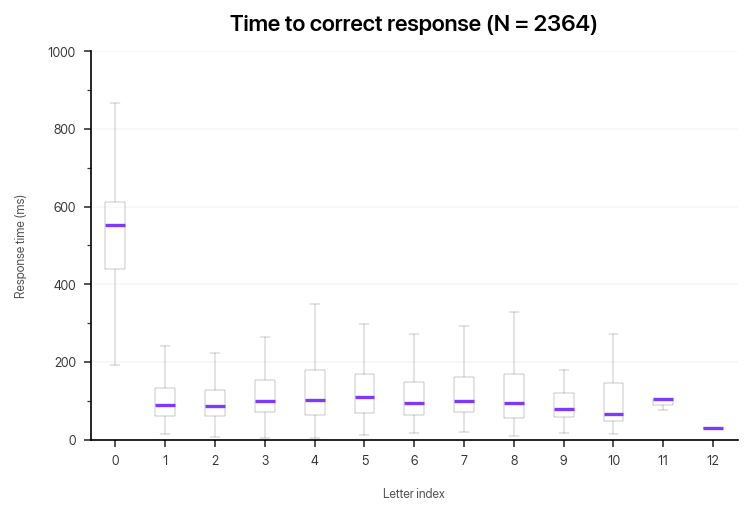

In [115]:
load_data()
plt.figure(figsize=FIGURE_SIZE)
correctly_typed = results[results["response"] == results["target_response"]]
for cursor_position, data in correctly_typed.groupby("cursor_position"):
    outlines_alpha = 0.5
    plt.boxplot(
        data["response_time"], 
        positions=[cursor_position],
        widths = 0.4,
        boxprops = dict(linewidth = 0.2, alpha = outlines_alpha),
        whiskerprops = dict(linewidth = 0.2, alpha = outlines_alpha),
        capprops = dict(linewidth = 0.2, alpha = outlines_alpha),
        flierprops = dict(marker = "o", markersize = 1, alpha = outlines_alpha, markeredgecolor = "none"),
        medianprops = dict(linewidth = 1.6, color = "C2"),
    )
plt.suptitle("")
plt.title(f"Time to correct response (N = {len(correctly_typed)})")
plt.xlabel("Letter index")
plt.ylabel("Response time (ms)")
plt.yticks(range(0, 1000, 100))
plt.ylim((0, 1000))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(200))
plt.gca().yaxis.set_minor_locator(ticker.MultipleLocator(100))
plt.tight_layout()